In [1]:
import pandas as pd
import numpy as np

from IPython.display import display

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from IPython.display import display
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
print('Packages for Mathematical Computation and visualization imported!')

Packages for Mathematical Computation and visualization imported!


In [2]:
df1 = pd.read_csv("datasets/cleanedbasic/brighton17-18.csv")
df2 = pd.read_csv("datasets/cleanedbasic/brighton18-19.csv")

In [3]:
df2.tail()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Per90G+A-PK,xG,npxG,xA,npxG+xAG,Per90xG,Per90xA,Per90xG+xA,Per90npxG,Per90npxG+xAG
25,Jason Steele,eng ENG,GK,27.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Markus Suttner,at AUT,DFGK,31.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Ben White,eng ENG,DF,20.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Squad Total,NaN,NaN,27.4,38,418,3420.0,38.0,35.0,24.0,...,1.42,35.3,30.7,24.5,55.2,0.93,0.64,1.57,0.81,1.45
29,Opponent Total,NaN,NaN,26.8,38,418,3420.0,38.0,60.0,39.0,...,2.34,59.1,51.4,38.7,90.1,1.56,1.02,2.58,1.35,2.37


In [4]:
df1.tail()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Per90G+A-PK,xG,npxG,xA,npxG+xAG,Per90xG,Per90xA,Per90xG+xA,Per90npxG,Per90npxG+xAG
26,Jayson Molumby,ie IRL,MF,17.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Steve Sidwell,eng ENG,MF,34.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,JiÅÃ­ SkalÃ¡k,cz CZE,FWMF,25.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,Squad Total,NaN,NaN,27.5,38,418,3420.0,38.0,33.0,25.0,...,1.39,37.0,31.8,26.2,58.0,0.97,0.69,1.66,0.84,1.53
30,Opponent Total,NaN,NaN,27.0,38,418,3420.0,38.0,49.0,36.0,...,2.21,50.8,48.4,34.1,82.5,1.34,0.90,2.23,1.27,2.17


In [5]:
df1.shape

(31, 29)

In [6]:
df2.shape

(30, 29)

In [7]:
df1 = df1[df1['Min'] > 0]
df2 = df2[df2['Min'] > 0]

In [8]:
dftotals1 = df1.copy()
dftotals2 = df2.copy()

df1 = df1.iloc[:-2]
df2 = df2.iloc[:-2]

In [9]:
df1.dtypes

Player            object
Nation            object
Pos               object
Age              float64
MP                 int64
Starts             int64
Min              float64
90s              float64
Gls              float64
Ast              float64
G-PK             float64
PK               float64
PKatt            float64
CrdY             float64
CrdR             float64
Per90Gls         float64
Per90Ast         float64
Per90G+A         float64
Per90G-PK        float64
Per90G+A-PK      float64
xG               float64
npxG             float64
xA               float64
npxG+xAG         float64
Per90xG          float64
Per90xA          float64
Per90xG+xA       float64
Per90npxG        float64
Per90npxG+xAG    float64
dtype: object

### Leeds United First Season VS Second Season Comparison

Leeds United fell firmly into the category of "second season syndrome" by achieving 59 points and a 9th place finish in their first season but only finishing 17th the following season, narrowly avoiding relegation. Firstly, we will look into some factors surrounding their squad such as player turnover between the two seasons, performance levels between the two seasons and more.

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0, flags=flags)


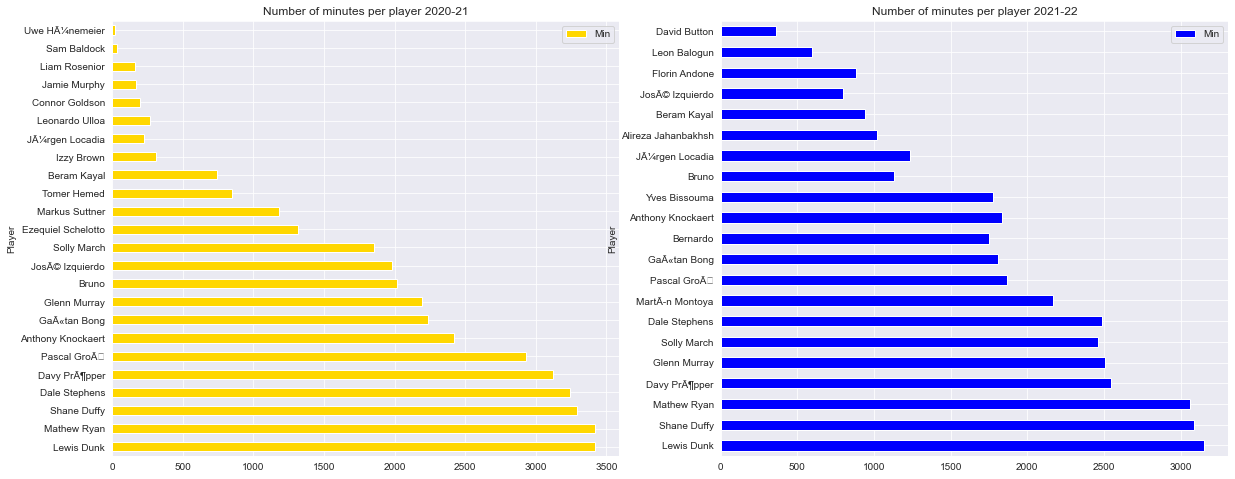

In [10]:
# first let's investigate squad turnover
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))
df1.plot.barh(x = 'Player', y = 'Min', ax= ax1, title='Number of minutes per player 2020-21',
             color='gold')
df2.plot.barh(x = 'Player', y = 'Min', ax= ax2, title='Number of minutes per player 2021-22',
             color='blue')
plt.show()

In [11]:
print("The number of players in Brighton's first season squad was: " + str(len(df1.index)))
print("The number of players in Brighton's second season squad was: " + str(len(df2.index)))

The number of players in Brighton's first season squad was: 24
The number of players in Brighton's second season squad was: 21


In [12]:
print("Mean minutes played in Brighton's first season squad was: " + str(df1['Min'].mean()))
print("Mean minutes played in Brighton's second season squad was: " + str(df2['Min'].mean()))

Mean minutes played in Brighton's first season squad was: 1566.4166666666667
Mean minutes played in Brighton's second season squad was: 1783.7619047619048


##### Let's look at performance metrics now. Firstly, we will focus on expected goals.

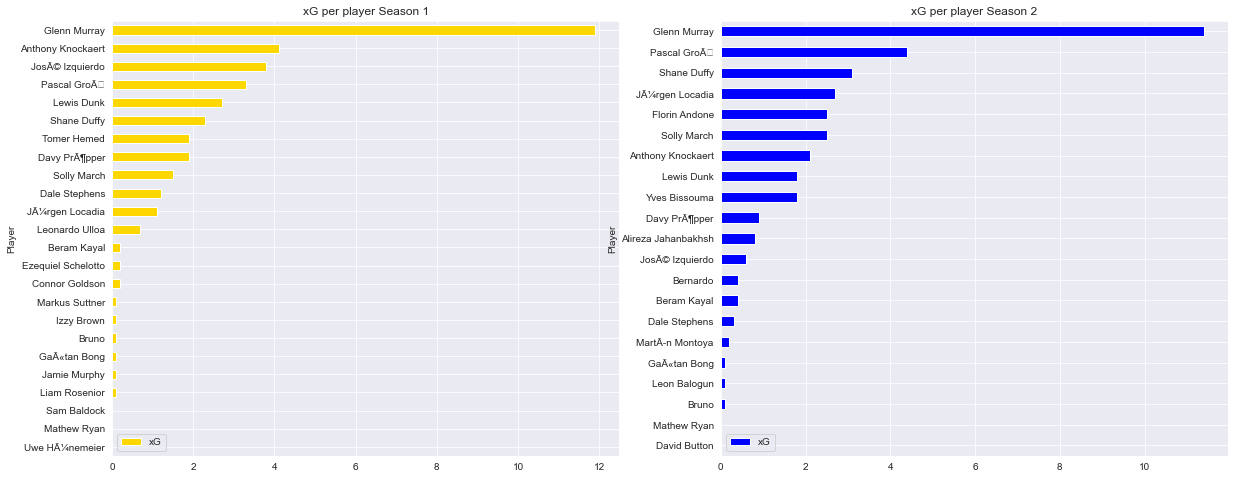

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
df_c1 = df1.sort_values('xG')
df_c2 = df2.sort_values('xG')
df_c1.plot.barh(x = 'Player', y = 'xG', ax= ax1, title='xG per player Season 1',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'xG', ax= ax2, title='xG per player Season 2',
             color='blue')
plt.show()

In [14]:
print("Team xG in Brighton's first season squad was: " + str(sum(df1['xG'])))
print("Team xG in Brighton's second season squad was: " + str(sum(df2['xG'])))

Team xG in Brighton's first season squad was: 37.60000000000002
Team xG in Brighton's second season squad was: 36.2


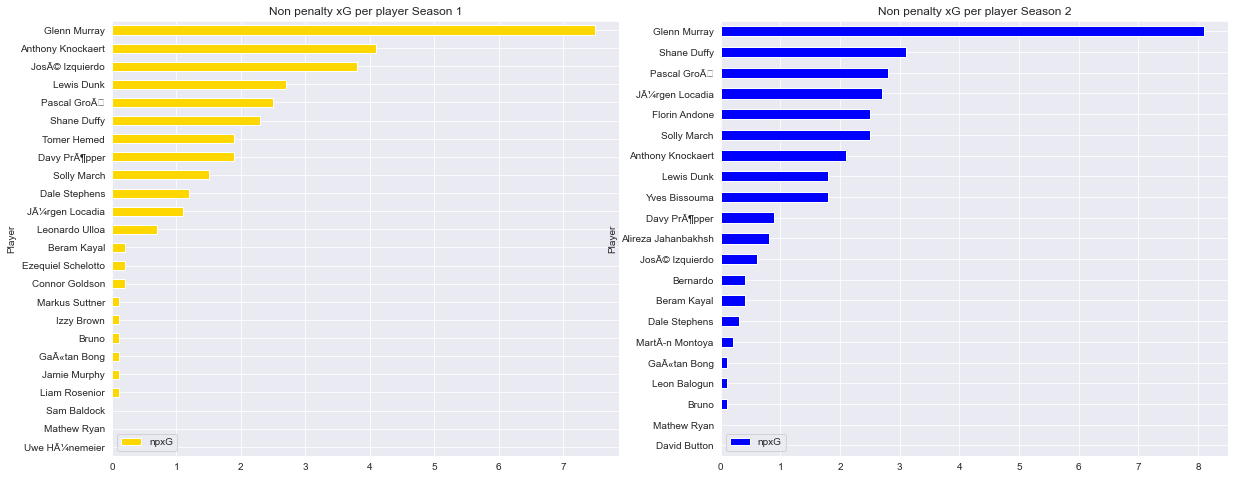

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_c1 = df1.sort_values('npxG')
df_c2 = df2.sort_values('npxG')
df_c1.plot.barh(x = 'Player', y = 'npxG', ax= ax1, title='Non penalty xG per player Season 1',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'npxG', ax= ax2, title='Non penalty xG per player Season 2',
             color='blue')
plt.show()

In [16]:
print("Non penalty team xG in Brighton's first season squad was: " + str(sum(df1['npxG'])))
print("Non penalty team xG in Brighton's second season squad was: " + str(sum(df2['npxG'])))

Non penalty team xG in Brighton's first season squad was: 32.400000000000006
Non penalty team xG in Brighton's second season squad was: 31.300000000000004


#### xG VS Actual Difference

In [17]:
df1['Actual - xG'] = df1['Gls'] - df1['xG']
df2['Actual - xG'] = df2['Gls'] - df2['xG']

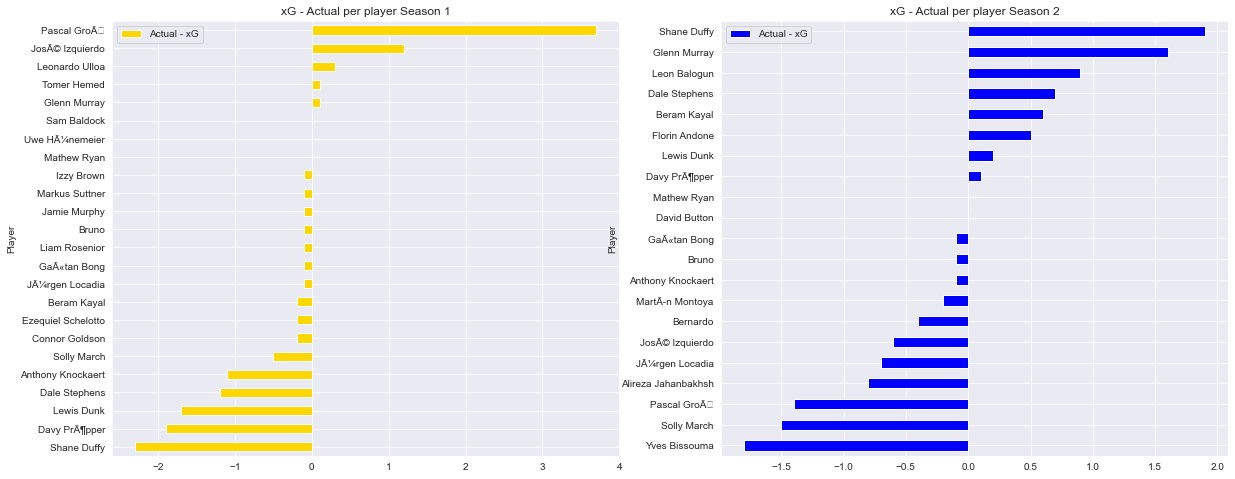

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
df_c1 = df1.sort_values('Actual - xG')
df_c2 = df2.sort_values('Actual - xG')
df_c1.plot.barh(x = 'Player', y = 'Actual - xG', ax= ax1, title='xG - Actual per player Season 1',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'Actual - xG', ax= ax2, title='xG - Actual per player Season 2',
             color='blue')
plt.show()

### Let's now investigate Assists and expected assists (xA). This will allow us to see did Leeds United create high quality chances and if this was potentially a factor in their drop off across the two seasons.

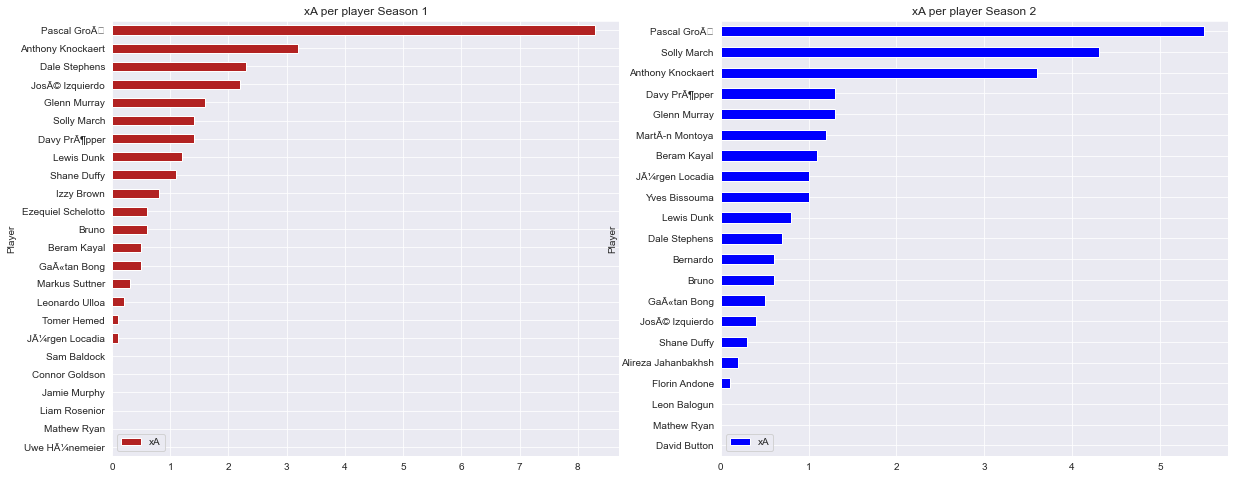

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
df_c1 = df1.sort_values('xA')
df_c2 = df2.sort_values('xA')
df_c1.plot.barh(x = 'Player', y = 'xA', ax = ax1, title = 'xA per player Season 1',
             color = 'firebrick')
df_c2.plot.barh(x = 'Player', y = 'xA', ax = ax2, title = 'xA per player Season 2',
             color = 'blue')
plt.show()

In [20]:
print("Team xA in Brighton's first season squad was: " + str(sum(df1['xA'])))
print("Team xA in Brighton's second season squad was: " + str(sum(df2['xA'])))

Team xA in Brighton's first season squad was: 26.400000000000006
Team xA in Brighton's second season squad was: 24.500000000000004


#### xA VS Actual Assists

In [21]:
df1['Actual - xA'] = df1['Ast'] - df1['xA']
df2['Actual - xA'] = df2['Ast'] - df2['xA']

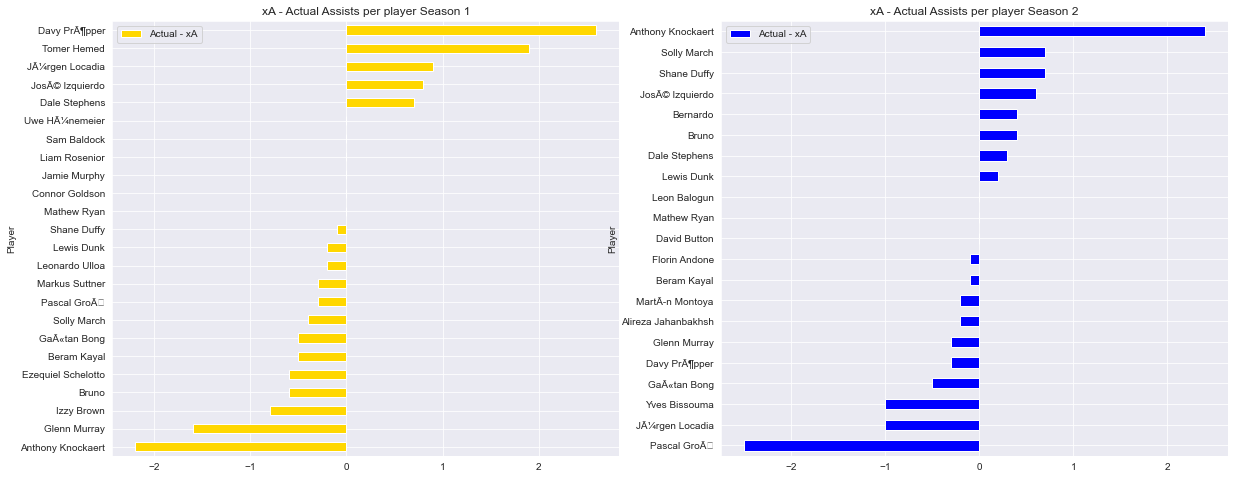

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_c1 = df1.sort_values('Actual - xA')
df_c2 = df2.sort_values('Actual - xA')
df_c1.plot.barh(x = 'Player', y = 'Actual - xA', ax= ax1, title='xA - Actual Assists per player Season 1',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'Actual - xA', ax= ax2, title='xA - Actual Assists per player Season 2',
             color='blue')
plt.show()

In [23]:
print("Team actual minus xA in Brighton's first season squad was: " + str(sum(df1['Actual - xA'])))
print("Team actual minus xA in Brighton's second season squad was: " + str(sum(df2['Actual - xA'])))

Team actual minus xA in Brighton's first season squad was: -1.4000000000000015
Team actual minus xA in Brighton's second season squad was: -0.5000000000000002


### Per 90 comparisons

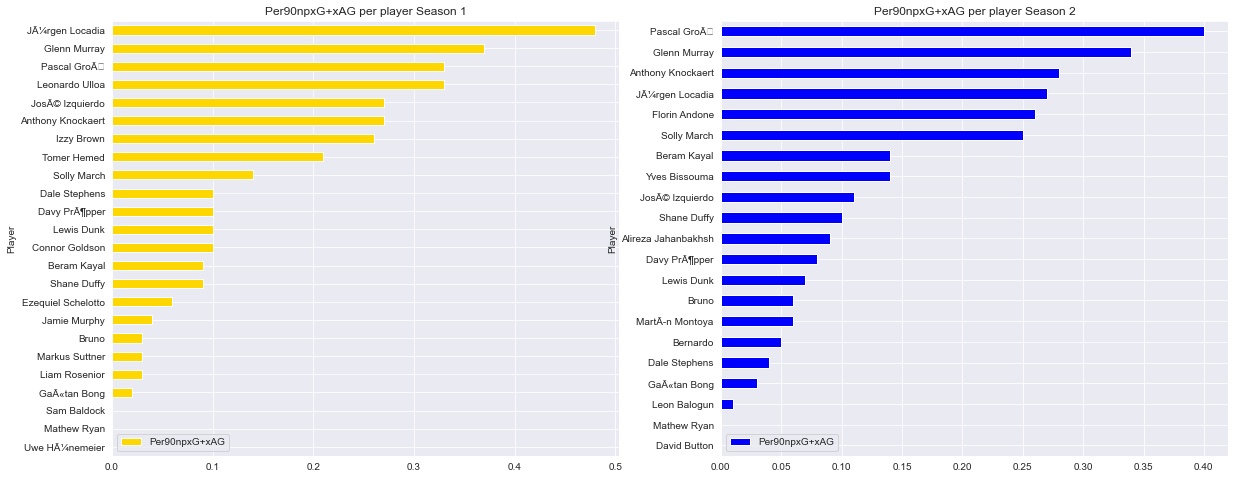

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_c1 = df1.sort_values('Per90npxG+xAG')
df_c2 = df2.sort_values('Per90npxG+xAG')
df_c1.plot.barh(x = 'Player', y = 'Per90npxG+xAG', ax= ax1, title='Per90npxG+xAG per player Season 1',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'Per90npxG+xAG', ax= ax2, title='Per90npxG+xAG per player Season 2',
             color='blue')
plt.show()

### Let's now compare players who played in both seasons for Brighton
By doing this, it allows us to better understand if for example a significant turnover of players or a loss of form from previously key players led to their "second season syndrome". We will focus on minutes played and per 90 metrics here.

In [25]:
players1 = list(df1['Player'])
players2 = list(df2['Player'])
d = {}
for i in range(len(players1)):
    if players1[i] in players2:
        val = df2.loc[df2['Player'] == players1[i], "Per90npxG+xAG"].item()
        # subtract 2021/22 data from 2020/21 for players who played both seasons
        ## if result of this subtraction is negative then the player performance has regressed
        vals = val - df1.loc[df1['Player'] == players1[i], "Per90npxG+xAG"].item()
        d[players1[i]] = vals
    else:
        continue

In [26]:
per90commonplayers = pd.DataFrame.from_dict(d, orient='index')

In [27]:
per90commonplayers = per90commonplayers.reset_index()
per90commonplayers.rename(columns = {'index': 'Name', 0: 'SeasonDifferenceXGXA'}, inplace = True)

In [28]:
players1 = list(df1['Player'])
players2 = list(df2['Player'])
d1 = {}
for i in range(len(players1)):
    if players1[i] in players2:
        val = df2.loc[df2['Player'] == players1[i], "Min"].item()
        vals = val - df1.loc[df1['Player'] == players1[i], "Min"].item()
        d1[players1[i]] = vals
    else:
        continue

In [29]:
minscommonplayers = pd.DataFrame.from_dict(d1, orient = 'index')
minscommonplayers = minscommonplayers.reset_index()
minscommonplayers.rename(columns = {'index': 'Name', 0: 'SeasonDifferenceMins'}, inplace = True)

In [30]:
result = pd.merge(minscommonplayers, per90commonplayers, on = ["Name"])

In [31]:
result.head()

,Name,SeasonDifferenceMins,SeasonDifferenceXGXA
0,Lewis Dunk,-269.0,-0.03
1,Mathew Ryan,-360.0,0.00
2,Shane Duffy,-205.0,0.01
3,Dale Stephens,-755.0,-0.06
4,Davy PrÃ¶pper,-573.0,-0.02


<AxesSubplot:title={'center':'Per90XG+XA Difference for Brighton players who played in 2017/18 and 2018/19 seasons'}, xlabel='Player Name', ylabel='Per90XG+XA'>

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0, flags=flags)


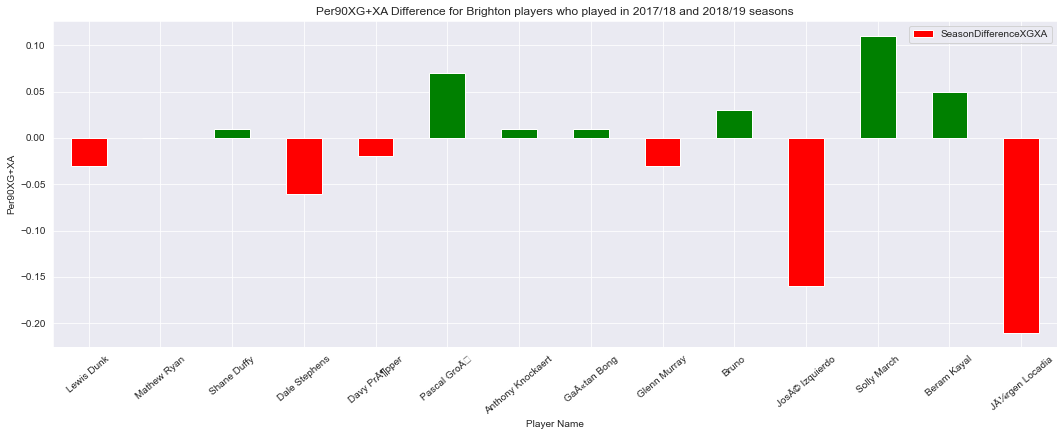

In [32]:
result.plot.bar(x = 'Name', y = 'SeasonDifferenceXGXA', rot = 40, figsize=(18, 6),
                title = 'Per90XG+XA Difference for Brighton players who played in 2017/18 and 2018/19 seasons',
                ylabel = 'Per90XG+XA', xlabel = 'Player Name',
                color=(result['SeasonDifferenceXGXA'] > 0).map({True: 'g', False: 'r'}))

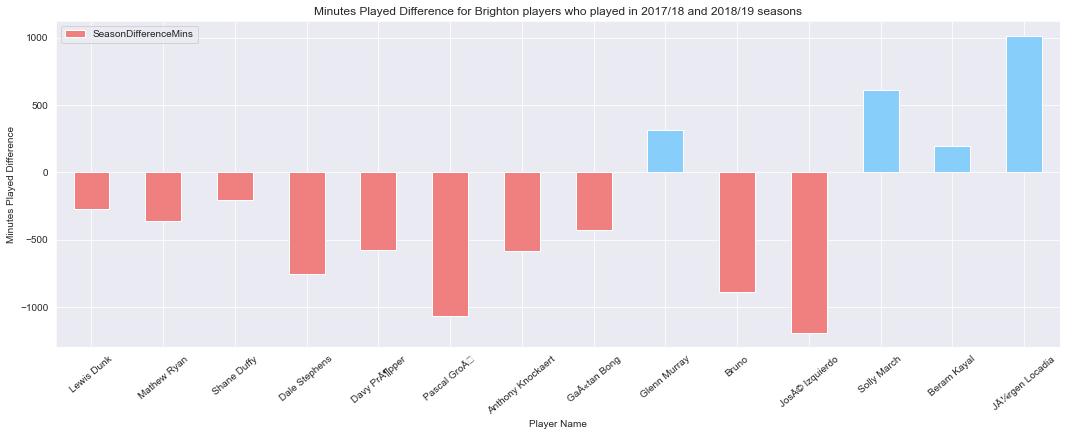

In [33]:
result.plot.bar(x = 'Name', y = "SeasonDifferenceMins", rot = 40, figsize = (18, 6),
                title = 'Minutes Played Difference for Brighton players who played in 2017/18 and 2018/19 seasons',
                ylabel = 'Minutes Played Difference', xlabel = 'Player Name',
                color = (result['SeasonDifferenceMins'] > 0).map({True: 'lightskyblue', False: 'lightcoral'}))
fig.patch.set_facecolor('white')

### Goalkeeper Analysis

In [34]:
gkseason1 = pd.read_csv("datasets/cleanedAdvanced/brighton-adkeeper1718-cleaned.csv")
gkseason2 = pd.read_csv("datasets/cleanedAdvanced/brighton-adkeeper18-19-cleaned.csv")

In [35]:
gkseason1.head()

,Player,Nation,Pos,Age,90s,GA,PKA,FK,CK,OG,...,PassesAvgLen,GoalKickAtt,GoalKickLaunch%,GoalKickAvgLen,CrossesOpp,CrossesStp,CrossesStp%,Sweep#OPA,Sweep#OPA/90,SweepAvgDist
0,Mathew Ryan,au AUS,GK,25.0,38.0,54,1,1,15,5,...,44.5,352,93.2,57.9,623,38,6.1,17,0.45,10.2
1,Squad Total,NaN,NaN,27.5,38.0,54,1,1,15,5,...,44.5,352,93.2,57.9,623,38,6.1,17,0.45,10.2


In [36]:
gkseason1.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'GA', 'PKA', 'FK', 'CK', 'OG',
       'ExpectedPSxG', 'ExpectedPSxG/SoT', 'ExpectedPSxG+/-', 'Expected/90',
       'LaunchedCmp', 'LaunchedAtt', 'LaunchedCmp%', 'PassesAtt', 'PassesThr',
       'PassesLaunch%', 'PassesAvgLen', 'GoalKickAtt', 'GoalKickLaunch%',
       'GoalKickAvgLen', 'CrossesOpp', 'CrossesStp', 'CrossesStp%',
       'Sweep#OPA', 'Sweep#OPA/90', 'SweepAvgDist'],
      dtype='object')

In [37]:
keepers1 = list(gkseason1['Player'])
keepers2 = list(gkseason2['Player'])
keeperdict1 = {}
keeperdict2 = {}
for i in range(len(keepers1)):
    if keepers1[i] in keepers2:
        keeperdict1[keepers1[i]] = gkseason1.loc[gkseason1['Player'] == keepers1[i], "ExpectedPSxG+/-"].item()
        keeperdict2[keepers2[i]] = gkseason2.loc[gkseason2['Player'] == keepers1[i], "ExpectedPSxG+/-"].item()
    else:
        continue

In [38]:
firstseasongk = pd.DataFrame.from_dict(keeperdict1, orient = 'index')
firstseasongk = firstseasongk.reset_index()
firstseasongk.rename(columns = {'index': 'Name', 0: '17-18ExpectedPSxG+/-'}, inplace = True)

In [39]:
secondseasongk = pd.DataFrame.from_dict(keeperdict2, orient = 'index')
secondseasongk = secondseasongk.reset_index()
secondseasongk.rename(columns = {'index': 'Name', 0: '18-19ExpectedPSxG+/-'}, inplace = True)

In [40]:
keepersmerged = pd.merge(firstseasongk, secondseasongk, on = ["Name"])

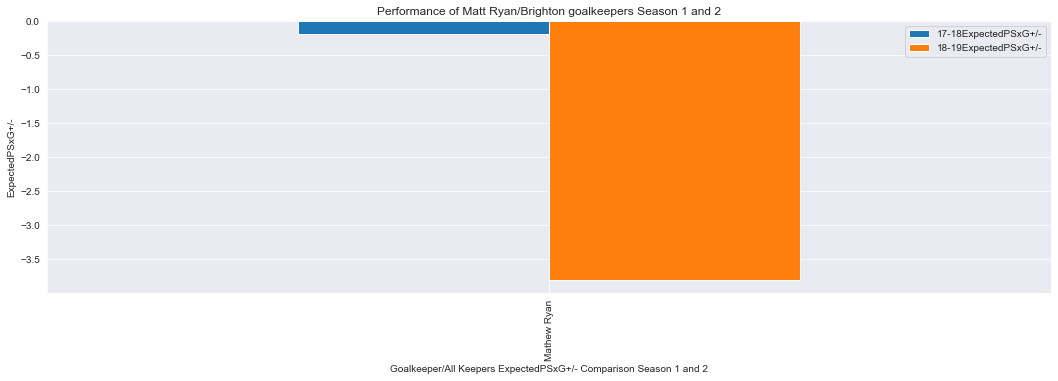

In [41]:
plt.rcParams["figure.figsize"] = (18,5)
data_chart = keepersmerged.set_index('Name').plot.bar()
data_chart.set_xlabel('Goalkeeper/All Keepers ExpectedPSxG+/- Comparison Season 1 and 2')
data_chart.set_ylabel('ExpectedPSxG+/-')
data_chart.set_title('Performance of Matt Ryan/Brighton goalkeepers Season 1 and 2')
plt.show()

In [42]:
keepers1 = list(gkseason1['Player'])
keepers2 = list(gkseason2['Player'])
launchdict1 = {}
launchdict2 = {}
for i in range(len(keepers1)):
    if keepers1[i] in keepers2:
        launchdict1[keepers1[i]] = gkseason1.loc[gkseason1['Player'] == keepers1[i], "PassesLaunch%"].item()
        launchdict2[keepers2[i]] = gkseason2.loc[gkseason2['Player'] == keepers1[i], "PassesLaunch%"].item()
    else:
        continue

firstseasongklaunch = pd.DataFrame.from_dict(launchdict1, orient = 'index')
firstseasongklaunch = firstseasongklaunch.reset_index()
firstseasongklaunch.rename(columns = {'index': 'Name', 0: 'Season1PassesLaunch'}, inplace = True)
secondseasongklaunch = pd.DataFrame.from_dict(launchdict2, orient = 'index')
secondseasongklaunch = secondseasongklaunch.reset_index()
secondseasongklaunch.rename(columns = {'index': 'Name', 0: 'Season2PassesLaunch'}, inplace = True)

In [43]:
keepersmerged1 = pd.merge(firstseasongklaunch, secondseasongklaunch, on = ["Name"])
keepersmergedall = pd.merge(keepersmerged1, keepersmerged, on = ["Name"])

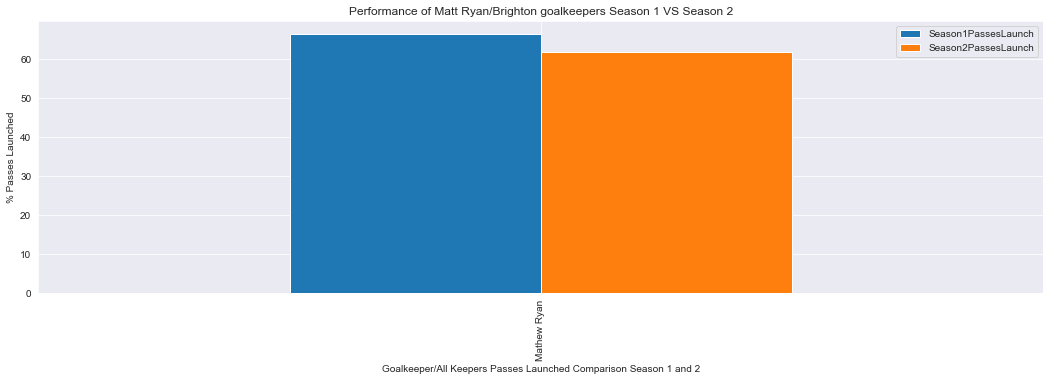

In [44]:
plt.rcParams["figure.figsize"] = (18,5)
data_chart = keepersmerged1.set_index('Name').plot.bar()
data_chart.set_xlabel('Goalkeeper/All Keepers Passes Launched Comparison Season 1 and 2')
data_chart.set_ylabel('% Passes Launched')
data_chart.set_title('Performance of Matt Ryan/Brighton goalkeepers Season 1 VS Season 2')
plt.show()

### Defensive Actions

In [45]:
defensivebris1 = pd.read_csv("datasets/cleanedAdvanced/brighton-defensive1718-cleaned.csv")
defensivebris2 = pd.read_csv("datasets/cleanedAdvanced/brighton-defensive18-19-cleaned.csv")

In [46]:
defensivebris1.head()

,Player,Nation,Pos,Age,90s,Tkl,TklWon,TacklesDef3rd,TacklesMid3rd,TacklesAtt3rd,...,VSDribblesAtt,VSDribblesTkl%,VSDribblesPast,Blocks,ShotBlock,PassBlock,Interceptions,Tkl+Int,Clearances,Errors
0,Lewis Dunk,eng ENG,DF,25.0,38.0,67,33,49,18,0,...,48,52.1,23,73,58,15,71,138,230,2
1,Mathew Ryan,au AUS,GK,25.0,38.0,0,0,0,0,0,...,3,0.0,3,0,0,0,3,3,10,3
2,Shane Duffy,ie IRL,DF,25.0,36.6,31,19,22,9,0,...,20,35.0,13,66,59,7,50,81,332,5
3,Dale Stephens,eng ENG,MF,28.0,36.0,104,62,63,39,2,...,114,28.1,82,53,16,37,63,167,69,1
4,Davy PrÃ¶pper,nl NED,MF,25.0,34.7,73,44,35,35,3,...,83,21.7,65,35,11,24,60,133,80,2


In [47]:
errors1 = list(defensivebris1['Player'])
errors2 = list(defensivebris2['Player'])
errorsdict1 = {}
errorsdict2 = {}
for i in range(len(errors1)):
    if errors1[i] in errors2:
        errorsdict1[errors1[i]] = defensivebris1.loc[defensivebris1['Player'] == errors1[i], "Errors"].item()
        errorsdict2[errors1[i]] = defensivebris2.loc[defensivebris2['Player'] == errors1[i], "Errors"].item()
    else:
        continue

firstseasonerrors = pd.DataFrame.from_dict(errorsdict1, orient = 'index')
firstseasonerrors = firstseasonerrors.reset_index()
firstseasonerrors.rename(columns = {'index': 'Name', 0: '17-18Errors'}, inplace = True)
secondseasonerrors = pd.DataFrame.from_dict(errorsdict2, orient = 'index')
secondseasonerrors = secondseasonerrors.reset_index()
secondseasonerrors.rename(columns = {'index': 'Name', 0: '18-19Errors'}, inplace = True)

In [48]:
errorsmerged1 = pd.merge(firstseasonerrors, secondseasonerrors, on = ["Name"])

In [49]:
errorsdf = errorsmerged1.iloc[:-1]
errorsdf.tail()

,Name,17-18Errors,18-19Errors
9,Bruno,0,1
10,JosÃ© Izquierdo,0,0
11,Solly March,0,0
12,Beram Kayal,0,0
13,JÃ¼rgen Locadia,1,0


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0, flags=flags)


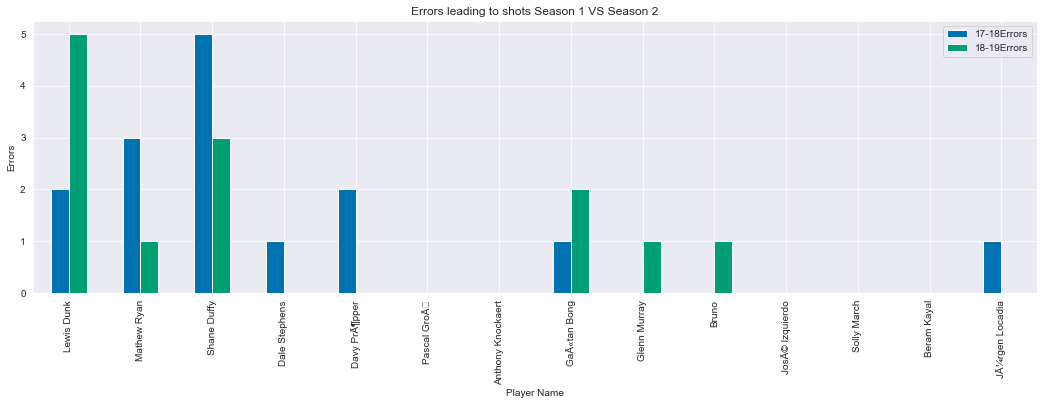

In [50]:
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = errorsdf.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('Errors')
data_chart.set_title('Errors leading to shots Season 1 VS Season 2')
plt.show()

### Discipline

In [104]:
discipline_firstseason = pd.read_csv("datasets/cleanedAdvanced/brighton-miscell1718-cleaned.csv")
discipline_secondseason = pd.read_csv("datasets/cleanedAdvanced/brighton-miscell18-19-cleaned.csv")

In [105]:
discipline_firstseason.tail()

,Player,Nation,Pos,Age,90s,CrdY,CrdR,2CrdY,Fls,Fld,...,Crs,Int,TklW,PKwon,PKcon,OG,Recov,AerialDuelWon,AerielDuelLost,AerialDuelWon%
20,Jamie Murphy,sct SCO,MF,27.0,1.9,0.0,0.0,0,1,5,...,2,1,2,0,0,0,6,0,2,0.0
21,Liam Rosenior,eng ENG,DF,33.0,1.8,0.0,0.0,0,1,0,...,1,4,3,0,0,0,5,2,1,66.7
22,Sam Baldock,eng ENG,FW,28.0,0.4,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
23,Uwe HÃ¼nemeier,de GER,DF,31.0,0.2,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,2,0,100.0
24,Squad Total,NaN,NaN,27.5,38.0,NaN,NaN,0,413,277,...,680,449,380,7,3,5,2122,796,777,50.6


In [106]:
discipline_firstseason.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'CrdY', 'CrdR', '2CrdY', 'Fls',
       'Fld', 'Off', 'Crs', 'Int', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov',
       'AerialDuelWon', 'AerielDuelLost', 'AerialDuelWon%'],
      dtype='object')

In [107]:
discipline_firstseason_cards1 = discipline_firstseason[:-1]

In [108]:
discipline_firstseason_cards1['CrdY'].sum()

54.0

In [109]:
discipline_firstseason_cards1['CrdR'].sum()

2.0

In [110]:
discipline_secondseason_cards2 = discipline_secondseason[-1:]

In [111]:
discipline_firstseason_cards1 = discipline_firstseason[-1:]

In [112]:
discipline_firstseason_cards11 = pd.DataFrame(np.array([['Squad Total', 54, 2]]),
                   columns = ['Player', 'CrdY', 'CrdR'])

In [113]:
discipline_secondseason_cards = discipline_secondseason_cards2[['Player', 'CrdY', 'CrdR']]

In [114]:
discipline_firstseason_cards = discipline_firstseason_cards.replace("Squad Total", "Season 1 Total")
discipline_secondseason_cards = discipline_secondseason_cards.replace("Squad Total", "Season 2 Total")

In [115]:
discipline_firstseason_cards

,Player,CrdY,CrdR
0,Season 1 Total,54,2


In [116]:
overall_discipline = pd.concat([discipline_firstseason_cards, discipline_secondseason_cards])

In [117]:
overall_discipline.dtypes

Player    object
CrdY      object
CrdR      object
dtype: object

In [118]:
overall_discipline[["CrdY", "CrdR"]] = overall_discipline[["CrdY", "CrdR"]].apply(pd.to_numeric)

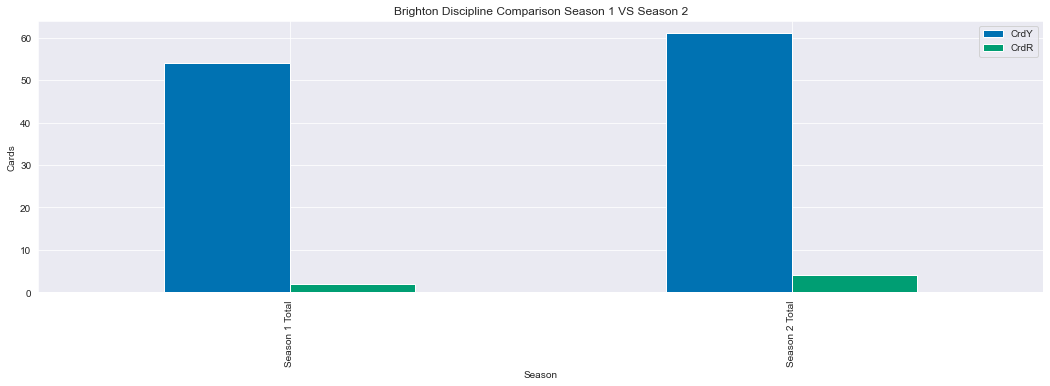

In [119]:
plt.rcParams["figure.figsize"] = (18, 5)
plt.style.use('seaborn-colorblind') 
data_chart = overall_discipline.set_index('Player').plot.bar()
data_chart.set_xlabel('Season')
data_chart.set_ylabel('Cards')
data_chart.set_title('Brighton Discipline Comparison Season 1 VS Season 2')
plt.show()

In [120]:
# aerial duels comparison
discipline_firstseason_duels = discipline_firstseason_cards1[['Player', 'AerialDuelWon%']]
discipline_secondseason_duels = discipline_secondseason_cards2[['Player', 'AerialDuelWon%']]

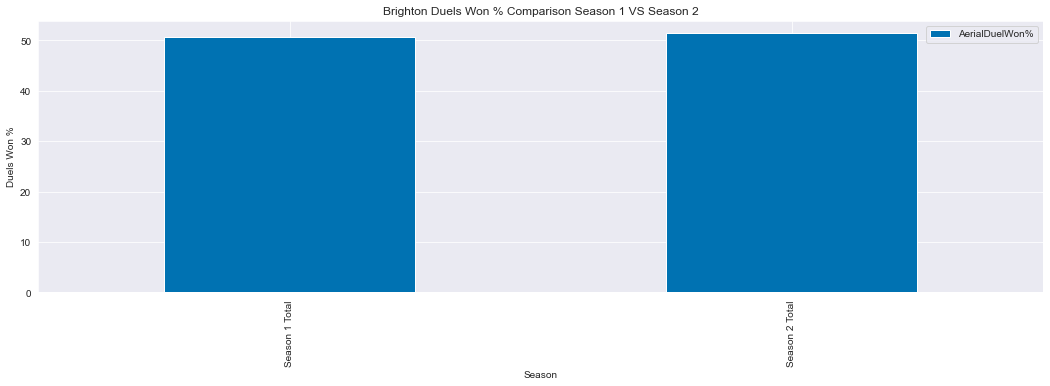

In [121]:
discipline_firstseason_duels = discipline_firstseason_duels.replace("Squad Total", "Season 1 Total")
discipline_secondseason_duels = discipline_secondseason_duels.replace("Squad Total", "Season 2 Total")
overall_duels = pd.concat([discipline_firstseason_duels, discipline_secondseason_duels])
plt.rcParams["figure.figsize"] = (18, 5)
plt.style.use('seaborn-colorblind') 
data_chart = overall_duels.set_index('Player').plot.bar()
data_chart.set_xlabel('Season')
data_chart.set_ylabel('Duels Won %')
data_chart.set_title('Brighton Duels Won % Comparison Season 1 VS Season 2')
plt.show()

### XG Comparison - For/Against

In [122]:
for_against_s1 = dftotals1.iloc[-2:]
for_against_s2 = dftotals2.iloc[-2:]

In [123]:
comp1 = for_against_s1[['Player', 'Gls', 'xG']]
comp2 = for_against_s2[['Player', 'Gls', 'xG']]

In [124]:
comp1.replace({'Squad Total': 'SquadTotalSeason1', 'Opponent Total': 'OpponentTotalSeason1'}, inplace = True)
comp2.replace({'Squad Total': 'SquadTotalSeason2', 'Opponent Total': 'OpponentTotalSeason2'}, inplace = True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


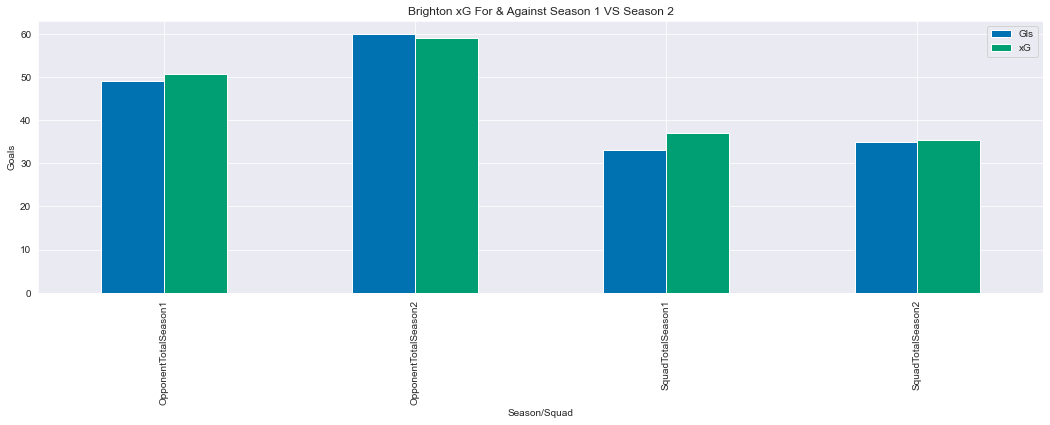

In [125]:
overall_xg = pd.concat([comp1, comp2])
overall_xg = overall_xg.sort_values('Player')
plt.rcParams["figure.figsize"] = (18, 5)
plt.style.use('seaborn-colorblind') 
data_chart = overall_xg.set_index('Player').plot.bar()
data_chart.set_xlabel('Season/Squad')
data_chart.set_ylabel('Goals')
data_chart.set_title('Brighton xG For & Against Season 1 VS Season 2')
plt.show()